In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def mh_sampler(x0, lnprob_fn, prob_fn, prob_fn_kwargs={}, iterations=100000):
    
    ndim = len(x0)
    
    chain = np.zeros((iterations, ndim))
    lnprob = np.zeros(iterations)
    accept_rate = np.zeros(iterations)
    
    chain[0] = x0
    lnprob0 = lnprob_fn(x0)
    lnprob[0] = lnprob0
    
    naccept = 0
    for ii in range(1, iterations):
        x_star, factor = prob_fn(x0, **prob_fn_kwargs)
        u = np.random.uniform(0, 1)
        lnprob_star = lnprob_fn(x_star)
        H = np.exp(lnprob_star - lnprob0) * factor
        
        if u < H:
            x0 = x_star
            lnprob0 = lnprob_star
            naccept += 1
        
        chain[ii] = x0
        lnprob[ii] = lnprob0
        accept_rate[ii] = naccept / ii
    
    return chain, accept_rate, lnprob

In [16]:
def gaussian_proposal(x, sigma=0.1):
    x_star = x + np.random.randn(len(x)) * sigma
    qxx = 1
    
    return x_star, qxx

In [17]:
def simple_gaussian_lnpost(x):
    mu = 0
    std = 1

    if x < 10 and x > -10:
        return -0.5 * (x-mu)**2 / std**2
    else:
        return -1e6

In [33]:
x0 = np.array([-2])
sigma = 2.38
chain, accept_rate, lnprob = mh_sampler(x0, simple_gaussian_lnpost, gaussian_proposal, prob_fn_kwargs={'sigma':sigma})

(array([7.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.400e+01, 3.600e+01,
        6.300e+01, 1.210e+02, 1.630e+02, 2.740e+02, 3.700e+02, 5.950e+02,
        7.930e+02, 1.051e+03, 1.383e+03, 1.794e+03, 2.405e+03, 2.896e+03,
        3.643e+03, 3.946e+03, 4.553e+03, 5.309e+03, 5.711e+03, 5.977e+03,
        6.914e+03, 6.326e+03, 6.537e+03, 6.038e+03, 5.724e+03, 5.168e+03,
        4.647e+03, 3.996e+03, 3.311e+03, 2.753e+03, 2.118e+03, 1.515e+03,
        1.178e+03, 8.470e+02, 5.750e+02, 3.930e+02, 2.930e+02, 1.770e+02,
        1.700e+02, 8.100e+01, 4.800e+01, 2.300e+01, 2.100e+01, 2.500e+01,
        1.100e+01, 3.000e+00]),
 array([-4.11021256, -3.94706938, -3.78392621, -3.62078303, -3.45763986,
        -3.29449668, -3.13135351, -2.96821033, -2.80506716, -2.64192398,
        -2.47878081, -2.31563763, -2.15249446, -1.98935128, -1.82620811,
        -1.66306493, -1.49992176, -1.33677858, -1.17363541, -1.01049223,
        -0.84734906, -0.68420588, -0.5210627 , -0.35791953, -0.19477635,
        -0.

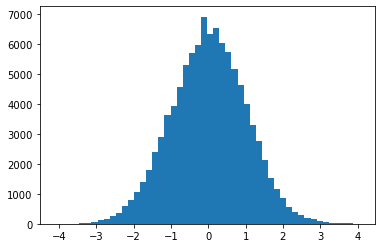

In [34]:
plt.hist(chain, 50)

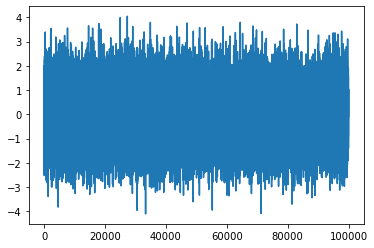

In [35]:
plt.plot(chain)

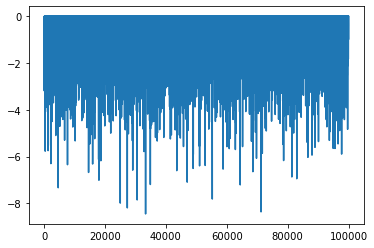

In [36]:
plt.plot(lnprob)

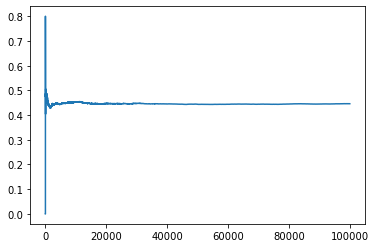

In [37]:
plt.plot(accept_rate)